In [9]:
import glob
import pandas as pd
df = pd.DataFrame(columns=['path', 'target'])
fn = glob.glob('train/cat.*.jpg')
for item in fn:
    s = pd.Series([item, 0], index=['path', 'target'])
    df = df.append(s, ignore_index=True)
fn = glob.glob('train/dog.*.jpg')
for item in fn:
    s = pd.Series([item, 1], index=['path', 'target'])
    df = df.append(s, ignore_index=True)
df

,path,target
0,train\cat.0.jpg,0
1,train\cat.1.jpg,0
2,train\cat.10.jpg,0
3,train\cat.100.jpg,0
4,train\cat.1000.jpg,0
5,train\cat.10000.jpg,0
6,train\cat.10001.jpg,0
7,train\cat.10002.jpg,0
8,train\cat.10003.jpg,0
9,train\cat.10004.jpg,0


path=train\cat.10095.jpg
ans=0
size= (499, 375)


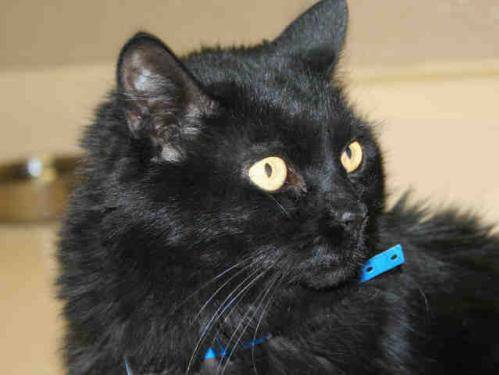

In [2]:
import random
from PIL import Image
c = random.randint(0, 24999)
data = df.iloc[c]
print('path=%s'%data['path'])
print('ans=%s'%data['target'])

img = Image.open(data['path'])
print('size=', img.size)
img

In [3]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224,224,3))
vgg.trainable = False

Using TensorFlow backend.


In [4]:
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
x = BatchNormalization()(vgg.output)
x = Flatten()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(2, activation='softmax')(x)
cnn = Model(inputs= vgg.input, output=x)

C:\Users\Big data\PycharmProjects\ElwingChou\venv\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


In [5]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
import numpy as np
from keras.utils.np_utils import to_categorical
x_np = np.array(df['path'])
y_np = np.array(df['target'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_np, y_np)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [7]:
from keras.applications.vgg16 import preprocess_input
train_counts=10
batch = 20
for times in range(train_counts):
    index = np.random.randint(0, x_train.shape[0], 20)
    x = []
    for fn in x_train[index]:
        img = preprocess_input(np.array(Image.open(fn).resize((224, 224))))
        x.append(img)
    y = y_train_cat[index]
    x = np.array(x)
    loss = cnn.train_on_batch(x,y)
    print('-'*10,'Train', times, '-'*10)
    print(loss)

---------- Train 0 ----------
[1.1681811, 0.5]
---------- Train 1 ----------
[4.6807795, 0.5]
---------- Train 2 ----------
[4.7738824, 0.6]
---------- Train 3 ----------
[5.5888333, 0.45]
---------- Train 4 ----------
[3.273254, 0.65]
---------- Train 5 ----------
[4.316461, 0.6]
---------- Train 6 ----------
[4.004845, 0.45]
---------- Train 7 ----------
[2.1952925, 0.6]
---------- Train 8 ----------
[3.263349, 0.65]
---------- Train 9 ----------
[4.1745596, 0.65]


In [8]:
index = np.random.randint(0, x_test.shape[0], 20)
x = []
for fn in x_test[index]:
    img = preprocess_input(np.array(Image.open(fn).resize((224, 224))))
    x.append(img)
y = y_test_cat[index]
x = np.array(x)
cnn.evaluate(x, y)

20/20 [==============================] - 5s 257ms/step


[8.05904769897461, 0.5]